In [1]:
from helpers import *
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
def create_datasets(file_source = '', reviews_source = ''):
    # MetaData 

    #### Movie metadata #### DF
    MovieMetadata_df = pd.read_csv(file_source +'MovieSummaries/movie.metadata.tsv', sep="\t",  header=None)

    #### Character metadata #### DF
    CharacterMetadata_df = pd.read_csv(file_source + 'MovieSummaries/character.metadata.tsv',sep="\t", header=None)

    # Define column headers as a list
    MovieMetadata_df_headers = [
        'Wikipedia movie ID',
        'Freebase movie ID',
        'Movie name',
        'Movie release date',
        'Movie box office revenue',
        'Movie runtime',
        'Movie languages (Freebase ID:name tuples)',
        'Movie countries (Freebase ID:name tuples)',
        'Movie genres (Freebase ID:name tuples)'
    ]

    MovieMetadata_df.columns = MovieMetadata_df_headers

    # Define column headers for the second dataset
    CharacterMetadata_df_headers = [
        'Wikipedia movie ID',
        'Freebase movie ID',
        'Movie release date',
        'Character name',
        'Actor date of birth',
        'Actor gender',
        'Actor height (in meters)',
        'Actor ethnicity (Freebase ID)',
        'Actor name',
        'Actor age at movie release',
        'Freebase character/actor map ID',
        'Freebase character ID',
        'Freebase actor ID'
    ]

    CharacterMetadata_df.columns = CharacterMetadata_df_headers

    # Text data 
    names_df = pd.read_csv(file_source+'MovieSummaries/name.clusters.txt', sep="\t", header=None)
    plot_summaries_df = pd.read_csv(file_source+'MovieSummaries/plot_summaries.txt', sep="\t",header=None)
    tvTropes_df = pd.read_csv(file_source+'MovieSummaries/tvtropes.clusters.txt',sep="\t", header=None)

    names_df_headers = [
        'Character Names',
        'Instances'
    ]

    names_df.columns = names_df_headers

    tvTropes_df_headers = [
        'Character Types',
        'Instances'
    ]

    tvTropes_df.columns = tvTropes_df_headers


    plot_summaries_df_headers = [
        'Wikipedia movie ID',
        'Summaries'
    ]

    plot_summaries_df.columns = plot_summaries_df_headers

    reviews = pd.read_csv(reviews_source)

    merged_Movie = MovieMetadata_df.merge(reviews, how='left', left_on = 'Movie name', right_on = 'title')


    # Function to extract the year
    def extract_year(date_str):
        if pd.isna(date_str):  # Check if the value is NaN
            return None  # Return None or a suitable placeholder for NaN
        if len(date_str) == 4:  # Check if it's a four-digit year
            return int(date_str)  # Return the year as an integer
        return pd.to_datetime(date_str, errors='coerce').year  # Convert to datetime and extract year


    # Extract the year without modifying the original column
    MovieMetadata_df['Year'] = MovieMetadata_df['Movie release date'].apply(extract_year)
    #MovieMetadata_df['Year'] = MovieMetadata_df['Year'].apply(lambda x: int(x) if pd.notna(x) else x)
    MovieMetadata_df['Year'] = pd.to_numeric(MovieMetadata_df['Year'], errors='coerce').astype('Int64')

    return MovieMetadata_df, CharacterMetadata_df, names_df, plot_summaries_df, tvTropes_df, merged_Movie


In [3]:
# Just fill this with wherever is your main data folder is (copy the path just before 'MovieSummaries'):
file_source = ""

# Same goes for the reviews dataset : but simply copy the entire path of where your reviews data is... 
reviews_path = "TMDB_movie_dataset_v11.csv"

### creating dataset by extracting the main CMU data ###
MovieMetadata_df, CharacterMetadata_df, names_df, plot_summaries_df, tvTropes_df, merged_Movie = create_datasets(file_source, reviews_path)

reviews = pd.read_csv(reviews_path)

MovieMetadata_df['Country dictionnaire'] = MovieMetadata_df['Movie countries (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Genre dictionnaire'] = MovieMetadata_df['Movie genres (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Language dictionnaire'] = MovieMetadata_df['Movie languages (Freebase ID:name tuples)'].apply(ast.literal_eval)

In [4]:
MovieMetadata_df_1 = pd.merge(MovieMetadata_df, plot_summaries_df, on = "Wikipedia movie ID", how="inner")
print(MovieMetadata_df_1.shape)


(42204, 14)


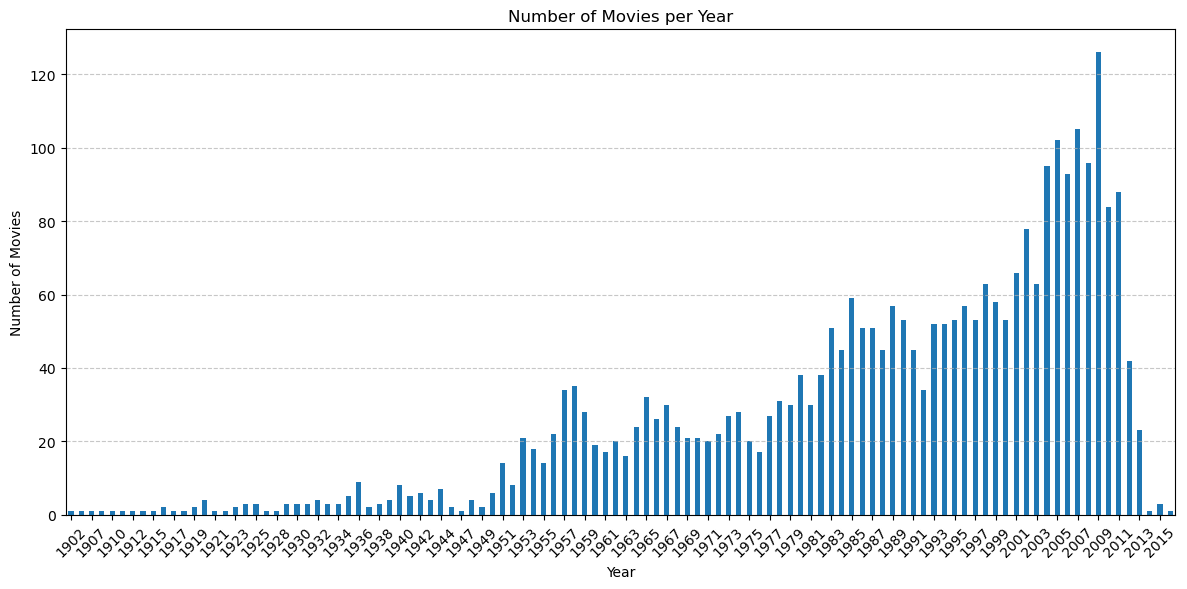

In [5]:
sf_movies = MovieMetadata_df[MovieMetadata_df['Genre dictionnaire'].apply(lambda x: 'Science Fiction' in x.values())]

# Count the number of movies per year, ignoring NaN years
sf_movies_per_year =sf_movies['Year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sf_movies_per_year.plot(kind='bar')
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Set the x-ticks to display only every 2nd or 3rd year
plt.xticks(ticks=range(0, len(sf_movies_per_year), 2), labels=sf_movies_per_year.index[::2], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
test = sf_movies[sf_movies['Year']==1953]
print(test['Movie name'])

4184                                   Phantom from Space
4758                                   Invaders from Mars
6256                                        Port Sinister
8144                                  The Revived Monster
11488                                           Spaceways
13229                                          The Twonky
18307                                     The Lost Planet
20351                                     Donovan's Brain
30764                                 Four Sided Triangle
36168                                            The Maze
36587                                    Project Moonbase
37808                            It Came from Outer Space
42874                                The Magnetic Monster
46622                       The Beast from 20,000 Fathoms
49460                                       Robot Monster
66073                      Abbott and Costello Go to Mars
66325                               Cat-Women of the Moon
66444         

In [86]:
#print(result_svm[result_svm['Year']==1953]['Movie name'])

test = MovieMetadata_df[MovieMetadata_df['Year']==2000]

In [95]:
movies_2000 = test['Movie name'].to_list()
print(movies_2000)

['Getting Away with Murder: The JonBenét Ramsey Mystery', 'Mehndi Waley Hath', 'A Boy Named Sue', 'The Stranger', 'On the Beach', 'Raju Chacha', 'Bless the Child', 'The Book of Stars', 'Before the Light Turns Green', 'Ordinary Decent Criminal', 'O Auto da Compadecida', 'The Golden Spiders: A Nero Wolfe Mystery', 'Okinawa Rendez-vous', 'Seenu', 'The House of Mirth', 'Work In Progress', 'Vallarasu', 'HotMen CoolBoyz', 'Chenkol', 'Ajax: Hark the Herald Angel Sings', '3 Strikes', 'Billa No. 786', 'New Battles Without Honor and Humanity', 'Devadasy', 'Justice Chowdhary', 'Curtain Call', 'Narasimham', 'Attack of the Killer Hog', 'Stanley', 'Canone Inverso', 'The Price of Milk', 'The Tony Blair Witch Project', 'The Komediant', 'Sweet', 'Cinderelmo', 'The Miracle Maker', "Can't Be Heaven", 'The Prophecy 3: The Ascent', 'Monster Mash', 'Glory Glory', 'Kyoko', 'Agniputra', 'Cry Freetown', 'Sonic Impact', 'Bij ons in de Jordaan', 'Dungeons & Dragons', 'Sex and the Matrix', 'The Heart of the World

# Space movies 

In [8]:
substrings = [
    "moon landing", "1969", "apollo 11", "apollo", "space race", "neil armstrong", 
    "buzz aldrin", "michael collins", "lunar module", "command module", "lunar surface", 
    "moon mission", "lunar landing", "astronauts", "astronaut", "flag planting", 
    "apollo program", "spaceflight", "saturn 5", "saturn v", "laika", "moonwalk", 
    "moon rover", "spacecraft", "nasa", "solar system", "mars", "satellite", 
    "satellites", "international space station", "yuri gagarin", "gagarin", 
    "sputnik", "mercury program", "mercury", "vostok program", "vostok", "luna program", 
    "space shuttle program", "mir space station", "gemini", "soyuz", "spacewalk", 
    "moonwalk", "space shuttle", "cosmonaut", "launchpad", "skylab", "lunar rover", 
    "space capsule", "space exploration"
]

pattern = '|'.join(substrings)

space_movies = MovieMetadata_df_1[MovieMetadata_df_1['Summaries'].str.contains(pattern, case=False, na=False)]

print(space_movies.shape)
print(space_movies['Movie name'])

(1368, 14)
0                                           Ghosts of Mars
36           One Small Step: The Story of the Space Chimps
82                                    The Astronaut Farmer
126                                               Superman
138                                                   Taxi
                               ...                        
42166                                              Twister
42174                                               Vajram
42191                                      Spaced Invaders
42193                                          Kalai Arasi
42202    The Super Dimension Fortress Macross II: Lover...
Name: Movie name, Length: 1368, dtype: object


In [9]:
word_counts = Counter()

for summary in space_movies['Summaries']:
    for substring in substrings:
        word_counts[substring] += summary.lower().count(substring.lower())

most_common_words = word_counts.most_common()

for word, count in most_common_words:
    print(f"{word}: {count}")

mars: 1524
satellite: 300
astronaut: 263
spacecraft: 203
nasa: 166
apollo: 144
astronauts: 143
1969: 100
mercury: 68
gemini: 60
solar system: 46
space shuttle: 42
satellites: 37
cosmonaut: 34
apollo 11: 16
command module: 12
sputnik: 11
spacewalk: 11
space exploration: 11
moon landing: 10
laika: 10
space race: 9
spaceflight: 7
launchpad: 7
lunar module: 6
apollo program: 6
moonwalk: 6
international space station: 6
vostok: 6
space capsule: 6
neil armstrong: 5
buzz aldrin: 4
michael collins: 4
skylab: 4
lunar surface: 3
gagarin: 3
saturn v: 2
yuri gagarin: 2
mercury program: 2
soyuz: 2
lunar rover: 2
moon mission: 1
moon rover: 1
mir space station: 1
lunar landing: 0
flag planting: 0
saturn 5: 0
vostok program: 0
luna program: 0
space shuttle program: 0


In [10]:
word_in_summaries_count = Counter()

for substring in substrings:
    count = space_movies['Summaries'].str.contains(substring, case=False, na=False).sum()
    word_in_summaries_count[substring] = count

most_common_words_in_summaries = word_in_summaries_count.most_common()

for word, count in most_common_words_in_summaries:
    print(f"{word}: {count}")

mars: 694
satellite: 186
astronaut: 143
spacecraft: 122
nasa: 99
1969: 82
astronauts: 73
apollo: 63
mercury: 41
solar system: 40
space shuttle: 35
satellites: 28
cosmonaut: 19
gemini: 18
apollo 11: 13
spacewalk: 10
space exploration: 10
sputnik: 9
moon landing: 8
space race: 7
command module: 7
laika: 7
apollo program: 6
spaceflight: 6
space capsule: 6
neil armstrong: 5
international space station: 5
launchpad: 5
michael collins: 4
vostok: 4
skylab: 4
buzz aldrin: 3
lunar module: 3
moonwalk: 3
gagarin: 3
lunar surface: 2
saturn v: 2
yuri gagarin: 2
soyuz: 2
lunar rover: 2
moon mission: 1
moon rover: 1
mercury program: 1
mir space station: 1
lunar landing: 0
flag planting: 0
saturn 5: 0
vostok program: 0
luna program: 0
space shuttle program: 0


# Training set 

In [11]:
'''
SPACE MOVIES 
'''

train_movies_space = ["Star Wars", "Interstellar", "Solaris", "Gravity", "Independance Day", "Apollo", "Ghosts of Mars", "Invaders from Mars", 
                      "2001: A Space Odyssey", "Odyssey 2050", "Star Trek", "Armageddon", "You only live twice", "Passengers", "Treasure Planet",
                      "Oblivion", "Stargate", "Rocket Man", 'The Lost Planet', 'Abbott and Costello Go to Mars', 'One Small Step: The Story of the Space Chimps']

train_movies_space = '|'.join(train_movies_space)

#rajouter les films "alien film"
# space opera 
#Supprimer Johnny apollo

train_movies_space = MovieMetadata_df_1[MovieMetadata_df_1['Movie name'].str.contains(train_movies_space, case=False, na=False)]
train_movies_space = train_movies_space[train_movies_space['Movie name'] != "Johnny Appolo"]

space_opera_movies = MovieMetadata_df_1[MovieMetadata_df_1['Movie genres (Freebase ID:name tuples)'].str.contains('Space opera', case=False, na=False)]
alien_movies = MovieMetadata_df_1[MovieMetadata_df_1['Movie genres (Freebase ID:name tuples)'].str.contains('Alien Film', case=False, na=False)]
alien_invasion_movies =  MovieMetadata_df_1[MovieMetadata_df_1['Movie genres (Freebase ID:name tuples)'].str.contains('Alien invasion', case=False, na=False)]


train_movies_space = pd.concat([train_movies_space, space_opera_movies, alien_movies, alien_invasion_movies], ignore_index=True)

print(train_movies_space.shape)

train_movies_space['label']=1 # on met un 1 pour tous les films sur l'espace
print(train_movies_space.shape)

(167, 14)
(167, 15)


In [12]:
'''
NON SPACE MOVIES
'''

non_space_movies = ['Mary Poppins', 'Hunger Games', 'Pirates','Harry Potter', 'Lord of the rings', 'The Hobbit', 'the Godfather',
                    'Dirty Dancing', 'Iron Man', 'Percy Jackson', 'Aladdin', 'Batman', 'Indiana Jones', 'Jurassic Park', 'James Bond', 
                     'Spider-Man', 'Captain America', 'American Pie', 'Saw IV'  ]

non_space_movies = '|'.join(non_space_movies)

non_space_movies = MovieMetadata_df_1[MovieMetadata_df_1['Movie name'].str.contains(non_space_movies, case=False, na=False)]


bollywod_movies = MovieMetadata_df_1[MovieMetadata_df_1['Movie genres (Freebase ID:name tuples)'].str.contains('Bollywood', case=False, na=False)]
bollywod_movies = bollywod_movies.head(30)
baseball_movies =  MovieMetadata_df_1[MovieMetadata_df_1['Movie genres (Freebase ID:name tuples)'].str.contains('Baseball', case=False, na=False)]
myth_movies =  MovieMetadata_df_1[MovieMetadata_df_1['Movie genres (Freebase ID:name tuples)'].str.contains('Mythological Fantasy', case=False, na=False)]
gay_porn_movies = MovieMetadata_df_1[MovieMetadata_df_1['Movie genres (Freebase ID:name tuples)'].str.contains('Gay pornography', case=False, na=False)]
fairy_tale_movies = MovieMetadata_df_1[MovieMetadata_df_1['Movie genres (Freebase ID:name tuples)'].str.contains('Fairy Tale', case=False, na=False)]

train_no_space_movies = pd.concat([non_space_movies, bollywod_movies, baseball_movies, myth_movies, gay_porn_movies, fairy_tale_movies], ignore_index=True)

print(train_no_space_movies.shape)
train_no_space_movies['label']=0 # on met un 0 qui ne sont pas sur l'espace 


(239, 14)


In [13]:
'''
Train set final 
'''

train_space_set = pd.concat([train_movies_space, train_no_space_movies], ignore_index=True)


In [40]:
''' 
on supprime les ponctuations et les stop words + tokenisation
'''

import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
   
    text = text.lower() # Conversion en minuscules
    # Suppression des caractères spéciaux
    text = re.sub(r'\s+', ' ', text)  # Plusieurs espaces → un espace
    text = re.sub(r'[^\w\s]', '', text)  # Supprime ponctuation
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

train_space_set['cleaned_summary'] = train_space_set['Summaries'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dorahborgi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dorahborgi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dorahborgi/nltk_data...


In [15]:
''' 
TF-IDF (Term Frequency - Inverse Document Frequency)
'''

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(train_space_set['cleaned_summary'])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, train_space_set['label'], test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        67
           1       1.00      0.38      0.55        55

    accuracy                           0.72       122
   macro avg       0.83      0.69      0.68       122
weighted avg       0.82      0.72      0.69       122



In [17]:
''' 
Préparation des films 
'''

MovieMetadata_df_1['cleaned_summary'] = MovieMetadata_df_1['Summaries'].apply(clean_text)
X_new = tfidf_vectorizer.transform(MovieMetadata_df_1['cleaned_summary'])
test
predictions = model.predict(X_new)

MovieMetadata_df_1['Predictions'] = predictions

In [18]:
result_lg = MovieMetadata_df_1[MovieMetadata_df_1['Predictions']==1]
print(result_lg.shape)
print(result_lg['Movie name'])

(552, 16)
36       One Small Step: The Story of the Space Chimps
126                                           Superman
132                                    Without Warning
312                                        Kin-Dza-Dza
543                                           Begotten
                             ...                      
41719                 Star Wars Episode IV: A New Hope
41738                                  2012: Supernova
42153                                      Hunter Prey
42191                                  Spaced Invaders
42193                                      Kalai Arasi
Name: Movie name, Length: 552, dtype: object


In [19]:
coefficients = model.coef_[0]
words = tfidf_vectorizer.get_feature_names_out() 

word_coefs = zip(words, coefficients)

sorted_word_coefs = sorted(word_coefs, key=lambda x: abs(x[1]), reverse=True)

print("Top 10 mots influents positifs (associés à 'espace'):")
for word, coef in sorted_word_coefs[:15]:
    print(f"{word}: {coef:.4f}")

print("\nTop 10 mots influents négatifs (opposés à 'espace'):")
for word, coef in sorted_word_coefs[-10:]:
    print(f"{word}: {coef:.4f}")

Top 10 mots influents positifs (associés à 'espace'):
planet: 1.5077
alien: 1.4069
earth: 1.3977
aliens: 1.3107
space: 1.0883
batman: -1.0737
luke: 0.8556
harry: -0.8520
jedi: 0.8030
enterprise: 0.7568
jack: -0.6807
aladdin: -0.6428
sinbad: -0.5961
mars: 0.5656
ship: 0.5630

Top 10 mots influents négatifs (opposés à 'espace'):
walton: 0.0000
warlock: 0.0000
wendover: 0.0000
whales: 0.0000
woodrue: 0.0000
wyman: 0.0000
yinsen: 0.0000
zack: 0.0000
zeila: 0.0000
zola: 0.0000


In [20]:
'''  
Modèle SVM
'''

from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90        67
           1       0.98      0.75      0.85        55

    accuracy                           0.88       122
   macro avg       0.90      0.87      0.87       122
weighted avg       0.89      0.88      0.87       122



In [21]:
test = MovieMetadata_df_1.copy()
test['cleaned_summary'] = test['Summaries'].apply(clean_text)
X_new = tfidf_vectorizer.transform(test['cleaned_summary'])

y_pred_new = svm_model.predict(X_new)

test['Predictions'] = y_pred_new

result_svm = test[test['Predictions']==1]
print(result_svm.shape)
print(result_svm['Movie name'])

(2156, 16)
0                                           Ghosts of Mars
7                                  The Mechanical Monsters
32                                                 Shivers
36           One Small Step: The Story of the Space Chimps
53                                            Choke Canyon
                               ...                        
42176                          Confessions of a Sexist Pig
42183                      The Brother from Another Planet
42191                                      Spaced Invaders
42193                                          Kalai Arasi
42202    The Super Dimension Fortress Macross II: Lover...
Name: Movie name, Length: 2156, dtype: object


In [22]:
coefficients = svm_model.coef_.toarray()[0]  
words = tfidf_vectorizer.get_feature_names_out()
word_coefs = zip(words, coefficients)

sorted_word_coefs = sorted(word_coefs, key=lambda x: abs(x[1]), reverse=True)

print("Top 10 mots influents positifs (associés à 'espace'):")
for word, coef in sorted_word_coefs[:10]:
    print(f"{word}: {coef:.4f}")

print("\nTop 10 mots influents négatifs (opposés à 'espace'):")
for word, coef in sorted_word_coefs[-10:]:
    print(f"{word}: {coef:.4f}")

Top 10 mots influents positifs (associés à 'espace'):
planet: 2.0702
earth: 1.7783
aliens: 1.7424
alien: 1.6339
space: 1.5997
batman: -1.4223
jedi: 1.1463
jar: 0.8875
bond: 0.8606
mars: 0.8264

Top 10 mots influents négatifs (opposés à 'espace'):
wendover: 0.0000
whales: 0.0000
wilderness: 0.0000
woodrue: 0.0000
wyman: 0.0000
yacht: 0.0000
yinsen: 0.0000
zack: 0.0000
zeila: 0.0000
zola: 0.0000


Idea: 
maybe increase the size of the training set
Avec logistic regression, 557 films 
Avec SVM, 2000, ca fait beaucoup sur 40000

In [23]:
all_genres = set()  # Utiliser un set pour éviter les doublons

# Itérer sur chaque ligne de la colonne 'Genre dictionnaire' pour extraire les genres
for genre_dict in MovieMetadata_df['Genre dictionnaire']:
    if isinstance(genre_dict, dict):  # Vérifier que c'est bien un dictionnaire
        all_genres.update(genre_dict.values())  # Ajouter les valeurs du dictionnaire au set

# Convertir le set en liste et trier
all_genres_list = sorted(list(all_genres))

# Afficher les genres
print(all_genres_list)

['Absurdism', 'Acid western', 'Action', 'Action Comedy', 'Action Thrillers', 'Action/Adventure', 'Addiction Drama', 'Adult', 'Adventure', 'Adventure Comedy', 'Airplanes and airports', 'Albino bias', 'Alien Film', 'Alien invasion', 'Americana', 'Animal Picture', 'Animals', 'Animated Musical', 'Animated cartoon', 'Animation', 'Anime', 'Anthology', 'Anthropology', 'Anti-war', 'Anti-war film', 'Apocalyptic and post-apocalyptic fiction', 'Archaeology', 'Archives and records', 'Art film', 'Auto racing', 'Avant-garde', 'B-Western', 'B-movie', 'Backstage Musical', 'Baseball', 'Beach Film', 'Beach Party film', 'Bengali Cinema', 'Biker Film', 'Biographical film', 'Biography', 'Biopic [feature]', 'Black comedy', 'Black-and-white', 'Blaxploitation', 'Bloopers & Candid Camera', 'Bollywood', 'Boxing', 'Breakdance', 'British Empire Film', 'British New Wave', 'Bruceploitation', 'Buddy Picture', 'Buddy cop', 'Buddy film', 'Business', 'C-Movie', 'Camp', 'Caper story', 'Cavalry Film', 'Chase Movie', 'Chi

In [24]:
film_titre = "Mary Poppins"

# Filtrer le dataframe pour trouver la ligne correspondante
film_ligne = MovieMetadata_df_1[MovieMetadata_df_1['Movie name'].str.contains(film_titre)]
print(film_ligne['Summaries'])

8    The film opens with Mary Poppins  perched in a...
Name: Summaries, dtype: object


### -----------------------------------------------------------------------------------------

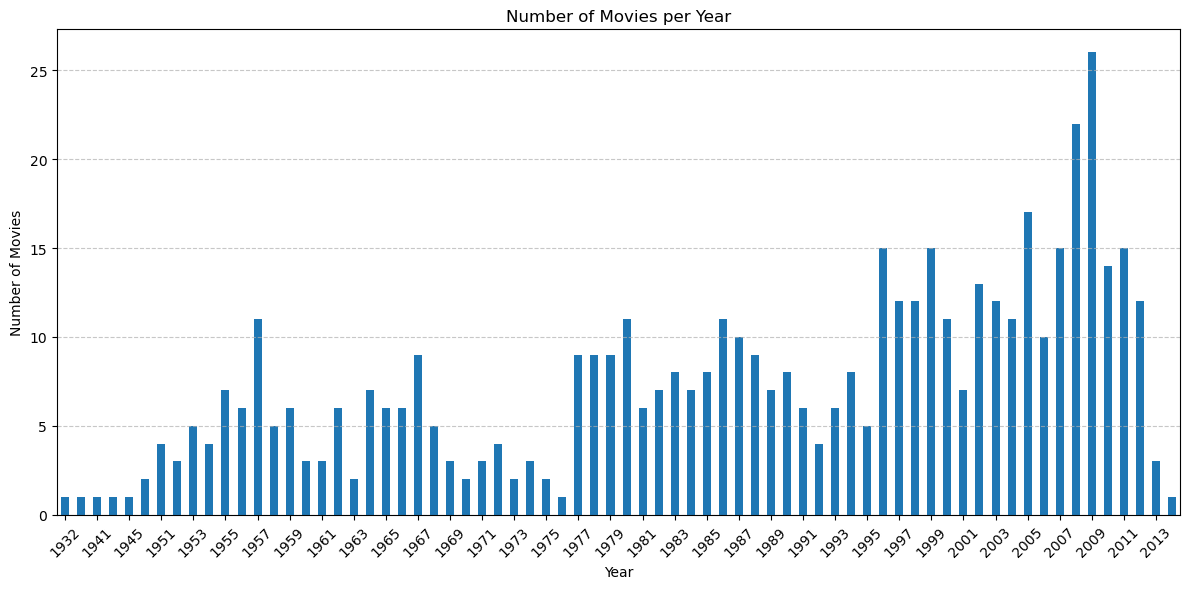

In [25]:
# Count the number of movies per year, ignoring NaN years
result_lg_per_year =result_lg['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
result_lg_per_year.plot(kind='bar')
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.xticks(ticks=range(0, len(result_lg_per_year), 2), labels=result_lg_per_year.index[::2], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

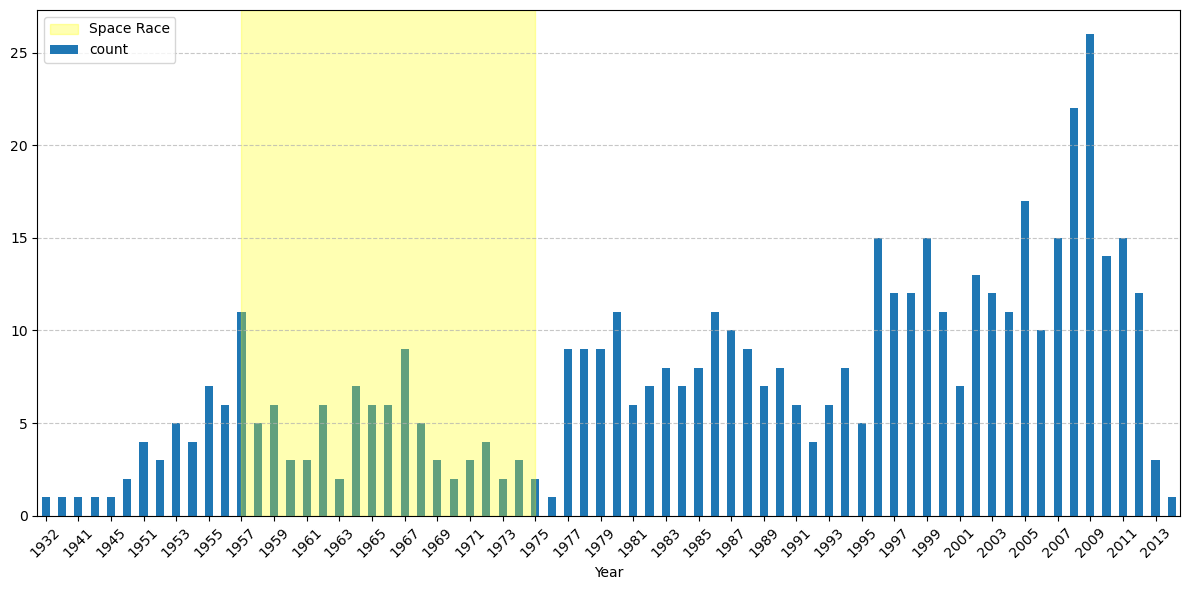

In [26]:
import matplotlib.pyplot as plt

result_lg_per_year = result_lg['Year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
result_lg_per_year.plot(kind='bar', ax=ax)

ax.axvspan(result_lg_per_year.index.get_loc(1957), result_lg_per_year.index.get_loc(1975), color='yellow', alpha=0.3, label='Space Race')


plt.xticks(ticks=range(0, len(result_lg_per_year), 2), labels=result_lg_per_year.index[::2], rotation=45)

plt.legend()


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

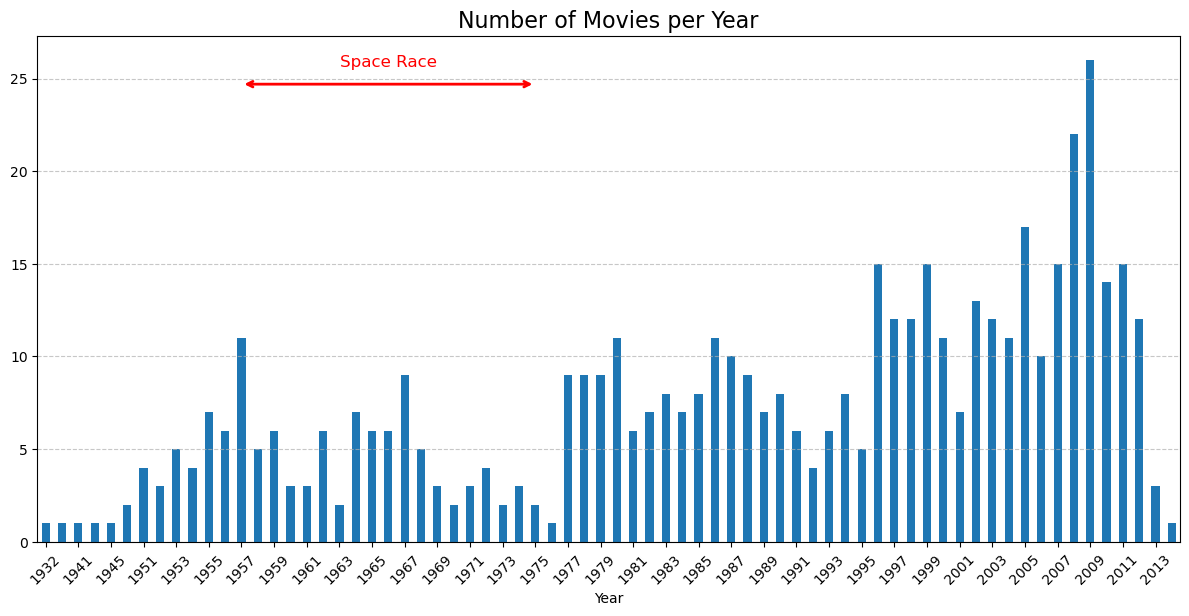

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
result_lg_per_year.plot(kind='bar', ax=ax)

ax.annotate('', xy=(result_lg_per_year.index.get_loc(1975), result_lg_per_year.max() * 0.95), 
            xytext=(result_lg_per_year.index.get_loc(1957), result_lg_per_year.max() * 0.95),
            arrowprops=dict(arrowstyle="<->", lw=2, color='red'))

ax.text((result_lg_per_year.index.get_loc(1957) + result_lg_per_year.index.get_loc(1975)) / 2, 
        result_lg_per_year.max() * 0.98, 'Space Race', ha='center', va='bottom', color='red', fontsize=12)

plt.xticks(ticks=range(0, len(result_lg_per_year), 2), labels=result_lg_per_year.index[::2], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.title('Number of Movies per Year', fontsize=16)

plt.show()

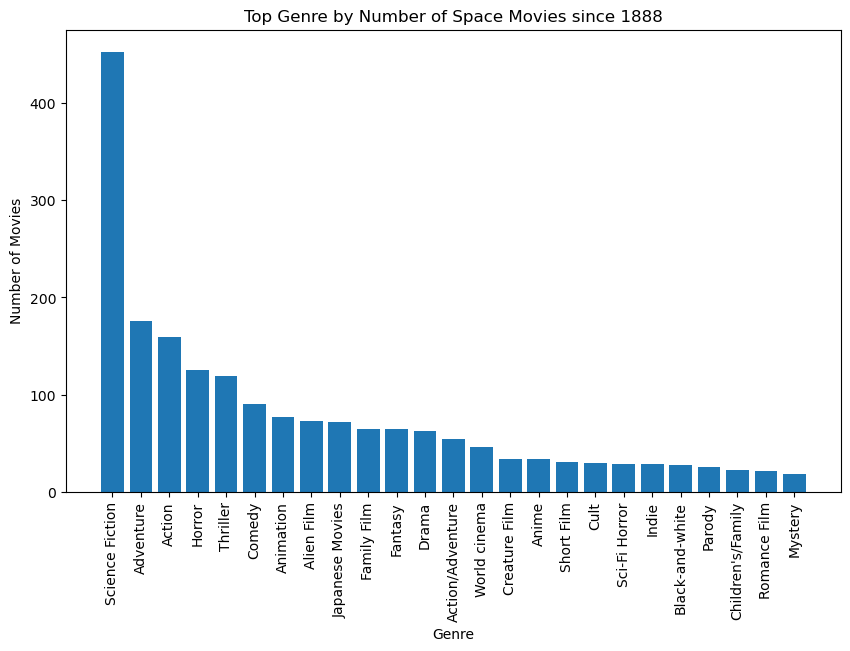

In [28]:
genre_counts = Counter()

for genre_dict in result_lg['Genre dictionnaire']:
    genre_counts.update(genre_dict.values())

genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse= True)


genres, counts = zip(*genre_counts)

top_n = 25
genres = genres[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(genres, counts)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top Genre by Number of Space Movies since 1888")
plt.xticks(rotation=90)  
plt.show()

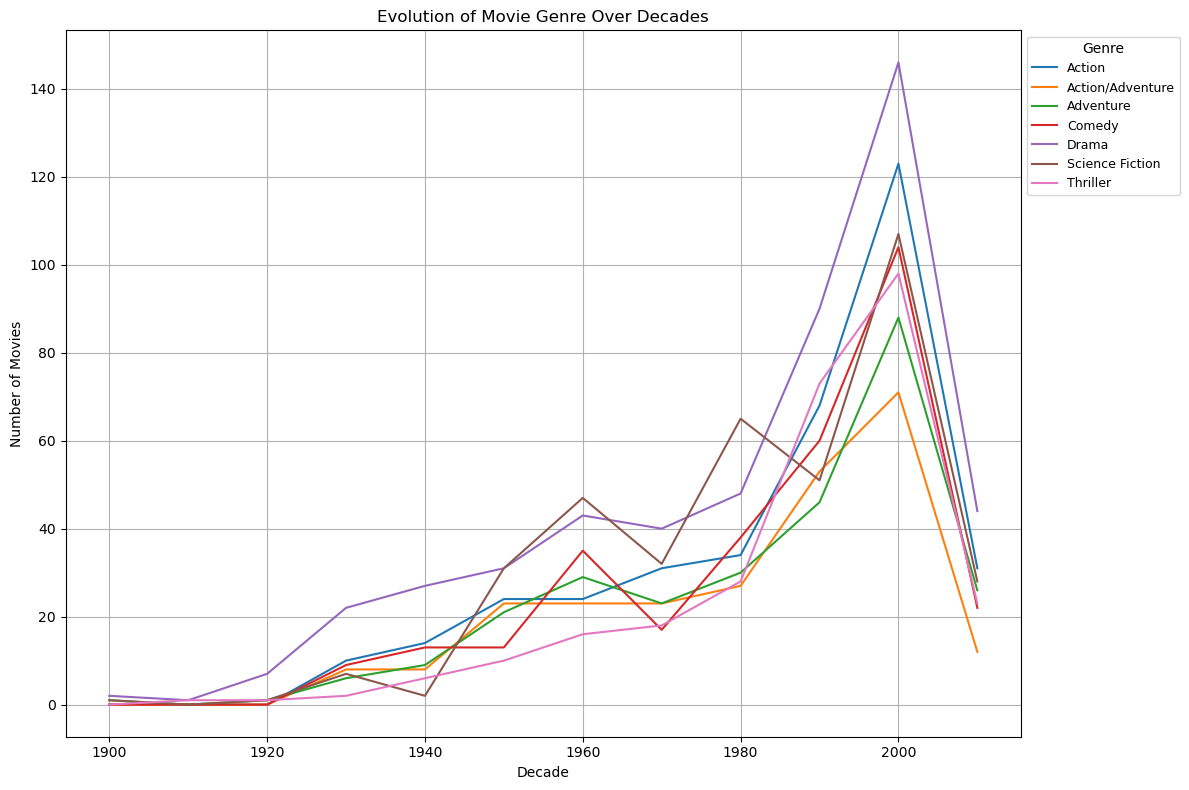

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Créer un dictionnaire pour compter les genres par décennie
genre_year_counts = defaultdict(lambda: defaultdict(int))

for index, row in space_movies.iterrows():
    genres = row['Genre dictionnaire'].values()
    year = row['Year']

    decade = (year // 10) * 10  # Ex: 1976 devient 1970, 1983 devient 1980
    for genre in genres:
        genre_year_counts[genre][decade] += 1

data = []

for genre, years in genre_year_counts.items():
    for year, count in years.items():
        data.append({'Genre': genre, 'Decade': year, 'Count': count})

df = pd.DataFrame(data)

top_genre = df.groupby('Genre')['Count'].sum().nlargest(7).index
df = df[df['Genre'].isin(top_genre)]

pivot_df = df.pivot(index='Decade', columns='Genre', values='Count').fillna(0)

plt.figure(figsize=(12, 8))

for genre in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[genre], label=genre)

plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Evolution of Movie Genre Over Decades")
plt.legend(title="Genre", loc="upper left", bbox_to_anchor=(1, 1), fontsize=9)
plt.grid()
plt.tight_layout()
plt.show()

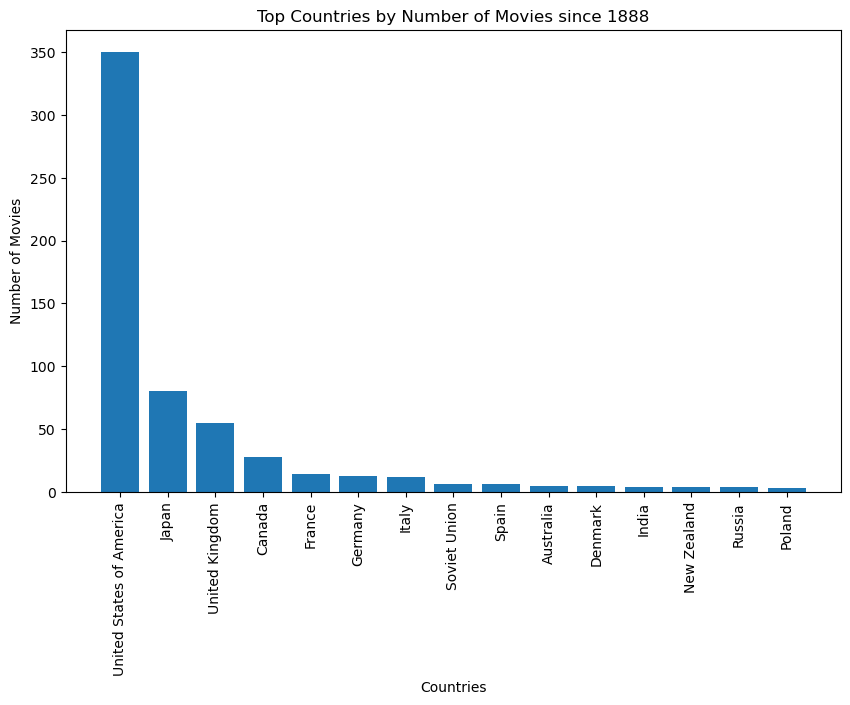

In [29]:
countries_counts = Counter()

for country_dict in result_lg['Country dictionnaire']:
    countries_counts.update(country_dict.values())

countries_counts = sorted(countries_counts.items(), key=lambda x: x[1], reverse= True)

countries, counts = zip(*countries_counts)

top_n = 15
countries = countries[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(countries, counts)
plt.xlabel("Countries")
plt.ylabel("Number of Movies")
plt.title("Top Countries by Number of Movies since 1888")
plt.xticks(rotation=90)  
plt.show()

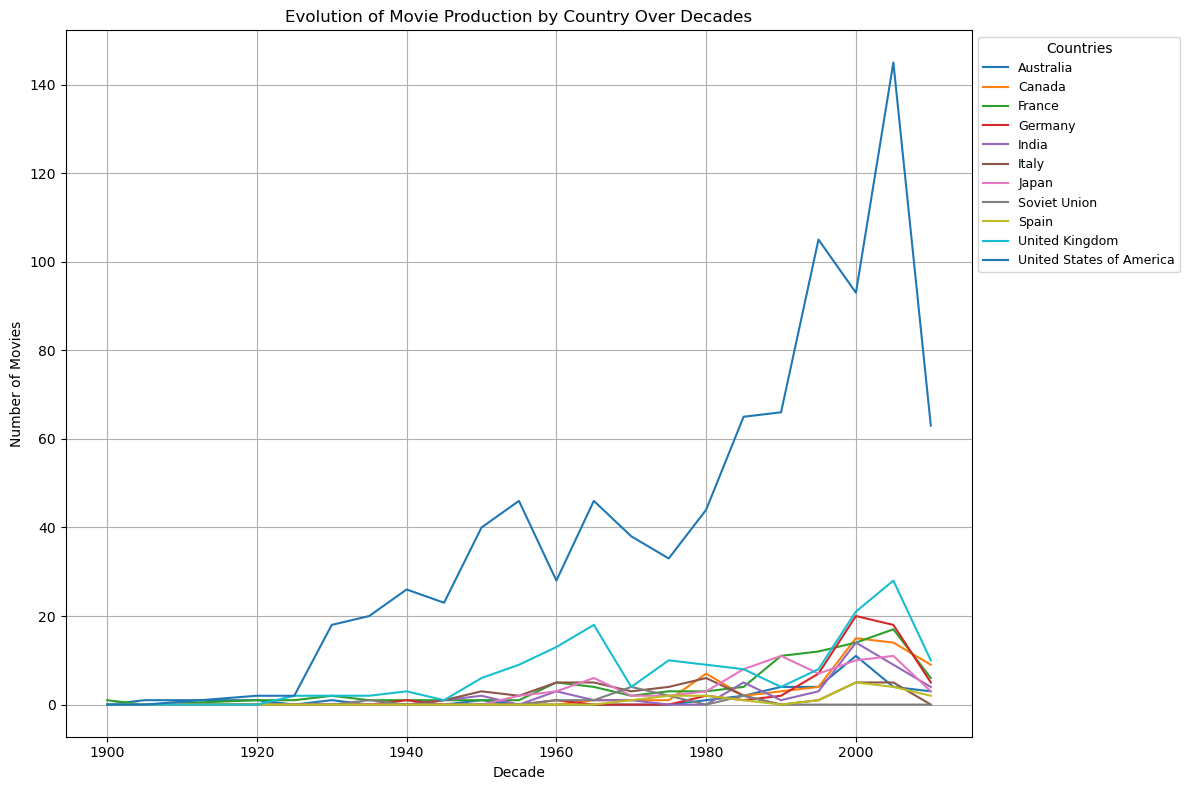

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Créer un dictionnaire pour compter les films par pays et par décennie
country_year_counts = defaultdict(lambda: defaultdict(int))

for index, row in space_movies.iterrows():
    countries = row['Country dictionnaire'].values()
    year = row['Year']
    # Grouper les années par période de 10 ans
    decade = (year // 5) * 5  # Ex: 1976 devient 1970, 1983 devient 1980
    for country in countries:
        country_year_counts[country][decade] += 1

# Convertir le dictionnaire en DataFrame
data = []

for country, years in country_year_counts.items():
    for year, count in years.items():
        data.append({'Country': country, 'Decade': year, 'Count': count})

df = pd.DataFrame(data)

# Sélectionner les 11 pays les plus fréquents
top_countries = df.groupby('Country')['Count'].sum().nlargest(11).index
df = df[df['Country'].isin(top_countries)]

# Créer un pivot avec les décennies comme index
pivot_df = df.pivot(index='Decade', columns='Country', values='Count').fillna(0)

# Tracer les données
plt.figure(figsize=(12, 8))

for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Evolution of Movie Production by Country Over Decades")
plt.legend(title="Countries", loc="upper left", bbox_to_anchor=(1, 1), fontsize=9)
plt.grid()
plt.tight_layout()
plt.show()

# Sentiment analysis au fil du temps

/var/folders/dl/y_0dp4yd3sd1cf5mnxcnpt100000gn/T/ipykernel_95800/3256825478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_movies[['positive', 'neutral', 'negative', 'compound']] = space_movies['Summaries'].apply(lambda x: pd.Series(get_sentiment_scores(x)))
/var/folders/dl/y_0dp4yd3sd1cf5mnxcnpt100000gn/T/ipykernel_95800/3256825478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_movies[['positive', 'neutral', 'negative', 'compound']] = space_movies['Summaries'].apply(lambda x: pd.Serie

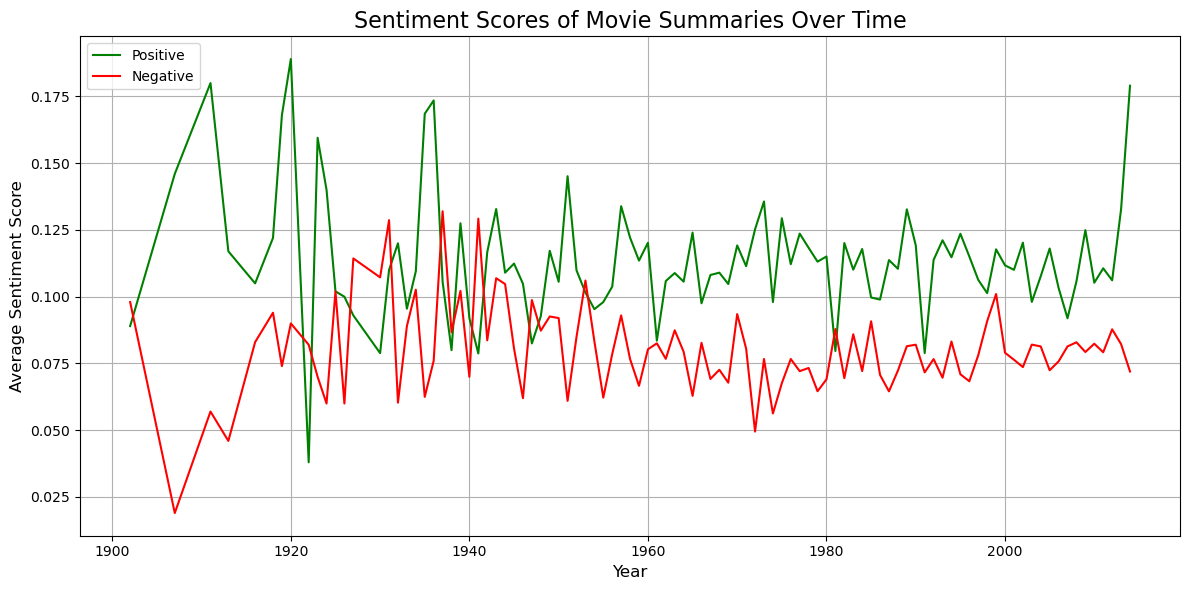

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

space_movies[['positive', 'neutral', 'negative', 'compound']] = space_movies['Summaries'].apply(lambda x: pd.Series(get_sentiment_scores(x)))

space_movies.fillna({'positive': 0, 'neutral': 0, 'negative': 0}, inplace=True)

sentiment_by_year = space_movies.groupby('Year')[['positive', 'neutral', 'negative']].mean()

plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_year.index, sentiment_by_year['positive'], label='Positive', color='green')
plt.plot(sentiment_by_year.index, sentiment_by_year['negative'], label='Negative', color='red')

plt.title('Sentiment Scores of Movie Summaries Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/dl/y_0dp4yd3sd1cf5mnxcnpt100000gn/T/ipykernel_95800/2518425212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_movies['Decade'] = pd.cut(space_movies['Year'], bins=bins, labels=labels, right=False)
/var/folders/dl/y_0dp4yd3sd1cf5mnxcnpt100000gn/T/ipykernel_95800/2518425212.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_decade = space_movies.groupby('Decade')[['positive', 'negative']].mean().reset_index()


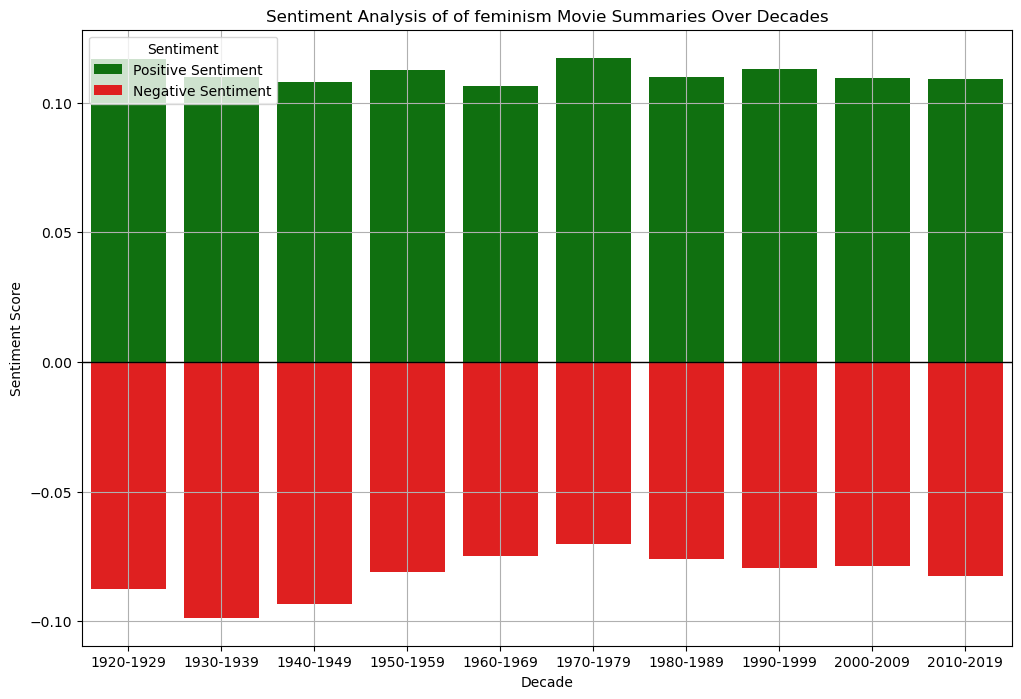

In [57]:
import seaborn as sns
# 2. Group movies by 10-year intervals
bins = range(1920, 2030, 10)  # Define the bins (adjust as needed)
labels = [f'{i}-{i+9}' for i in range(1920, 2020, 10)]  # Labels for the bins (one less than the number of bins)
space_movies['Decade'] = pd.cut(space_movies['Year'], bins=bins, labels=labels, right=False)

# 3. Group by the 'Decade' and calculate the average sentiment for each decade
sentiment_by_decade = space_movies.groupby('Decade')[['positive', 'negative']].mean().reset_index()

# 4. Create a bar plot with positive sentiment on top and negative sentiment on the bottom
plt.figure(figsize=(12, 8))

# Positive sentiment bars (top)
sns.barplot(x='Decade', y='positive', data=sentiment_by_decade, color='green', label='Positive Sentiment')

# Negative sentiment bars (bottom)
# To show negative sentiment below the x-axis, we multiply by -1
sns.barplot(x='Decade', y='negative', data=sentiment_by_decade, color='red', label='Negative Sentiment', estimator=lambda x: -x.mean())

# Invert negative bars to appear below zero
plt.axhline(0, color='black', linewidth=1)  # Add a horizontal line at y=0 for separation
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of of feminism Movie Summaries Over Decades')

# Customize the plot to better represent the sentiment
plt.legend(title='Sentiment', loc='upper left')
plt.grid(True)
plt.show()

/var/folders/dl/y_0dp4yd3sd1cf5mnxcnpt100000gn/T/ipykernel_95800/3553067103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_movies['mentions_alien'] = space_movies['Summaries'].apply(mentions_alien)


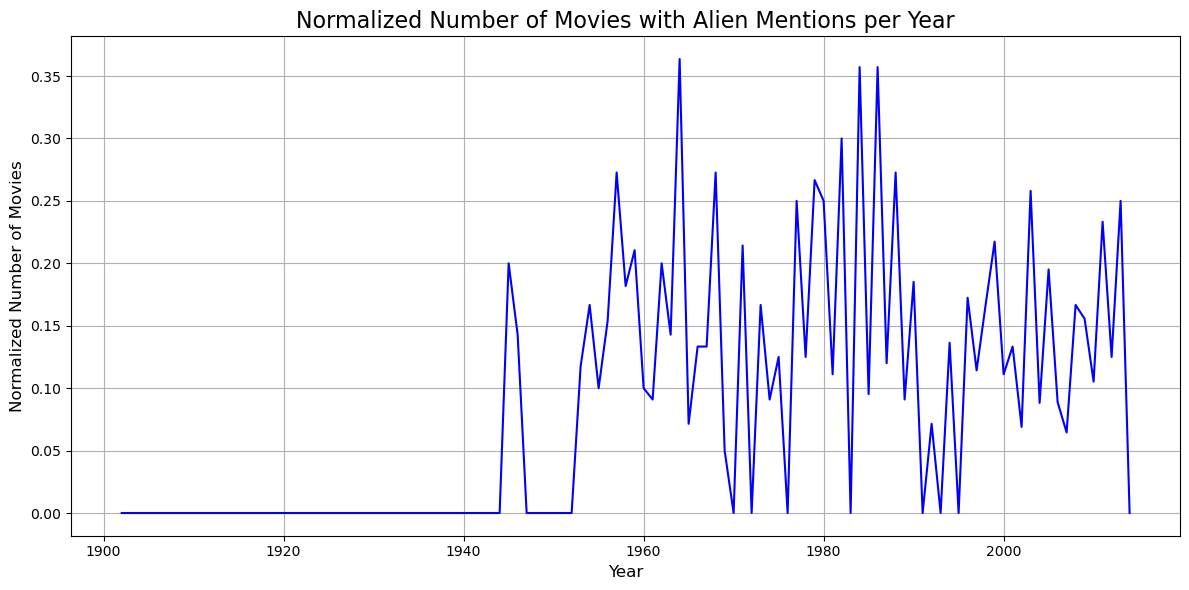

In [31]:
def mentions_alien(text):
    if isinstance(text, str):
        return 'alien' in text.lower()
    return False

space_movies['mentions_alien'] = space_movies['Summaries'].apply(mentions_alien)
films_with_aliens = space_movies.groupby('Year')['mentions_alien'].sum()

total_films_per_year =space_movies.groupby('Year').size()

normalized_films_with_aliens = films_with_aliens / total_films_per_year

plt.figure(figsize=(12, 6))
plt.plot(normalized_films_with_aliens.index, normalized_films_with_aliens, color='b', label='Normalized Films with Aliens')

plt.title('Normalized Number of Movies with Alien Mentions per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Number of Movies', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/dl/y_0dp4yd3sd1cf5mnxcnpt100000gn/T/ipykernel_95800/1973629958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_movies['Decade'] = (space_movies['Year'] // 10) * 10


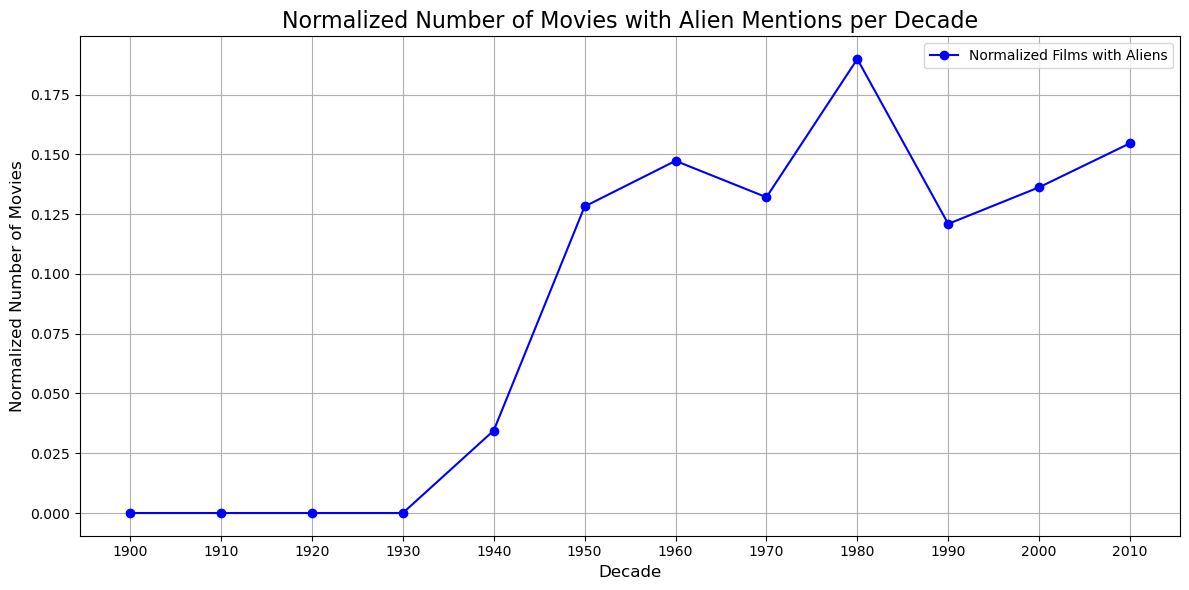

In [61]:
space_movies['Decade'] = (space_movies['Year'] // 10) * 10
# Regrouper les films par décennie
films_with_aliens_decade = space_movies.groupby('Decade')['mentions_alien'].sum()
total_films_per_decade = space_movies.groupby('Decade').size()

# Normaliser le nombre de films avec des mentions d'aliens
normalized_films_with_aliens_decade = films_with_aliens_decade / total_films_per_decade

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(normalized_films_with_aliens_decade.index, normalized_films_with_aliens_decade, 
         color='b', marker='o', label='Normalized Films with Aliens')

plt.title('Normalized Number of Movies with Alien Mentions per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Normalized Number of Movies', fontsize=12)
plt.grid(True)
plt.xticks(normalized_films_with_aliens_decade.index)  # Afficher chaque décennie sur l'axe X
plt.tight_layout()
plt.legend()
plt.show()

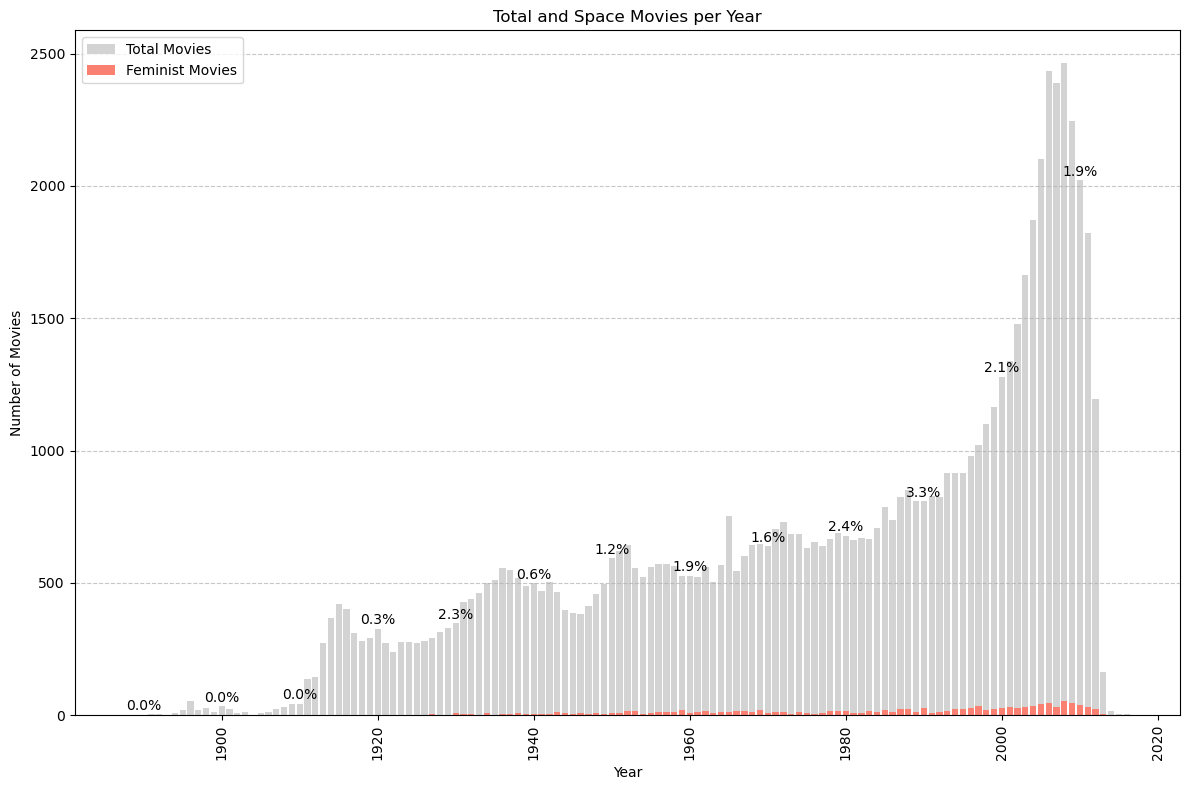

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Count the total number of movies per year
count_per_year_all = MovieMetadata_df.groupby('Year').size().reset_index(name='total_movies')

# Count the number of feminist movies per year
count_per_year_space_movies = space_movies.groupby('Year').size().reset_index(name='space_movies')

# Merge the two counts on 'Year'
merged_counts = pd.merge(count_per_year_all, count_per_year_space_movies, on='Year', how='left')

# Fill missing values with 0 (if no feminist movies are present for that year)
merged_counts['space_movies'] = merged_counts['space_movies'].fillna(0)

# Calculate the percentage of feminist movies
merged_counts['space_percentage'] = merged_counts['space_movies'] / merged_counts['total_movies'] * 100

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))

# Plot the overall number of movies
plt.bar(merged_counts['Year'], merged_counts['total_movies'], color='lightgray', label='Total Movies')

# Plot the feminist movies on top (stacked)
plt.bar(merged_counts['Year'], merged_counts['space_movies'], color='salmon', label='Space Movies')

# Labeling
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Total and Space Movies per Year')

# Show the percentage of feminist movies on top of the bars every 10 years
for i, row in merged_counts.iterrows():
    if row['Year'] % 10 == 0:  # Show only every 10 years
        plt.text(row['Year'], row['total_movies'] + 5, f"{row['space_percentage']:.1f}%", ha='center', va='bottom')

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Display the plot
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [49]:
space_movies['cleaned_summary'] = space_movies['Summaries'].apply(clean_text)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.5, min_df=2, stop_words='english')  # Ajuste min_df pour ignorer les mots rares
doc_term_matrix = vectorizer.fit_transform(space_movies['cleaned_summary'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Choisir le nombre de thèmes (ici, 5)
lda.fit(doc_term_matrix)

# Afficher les mots-clés pour chaque thème
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Thème {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

feature_names = vectorizer.get_feature_names_out()

display_topics(lda, feature_names, 10)

/var/folders/dl/y_0dp4yd3sd1cf5mnxcnpt100000gn/T/ipykernel_95800/3171700143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_movies['cleaned_summary'] = space_movies['Summaries'].apply(clean_text)


Thème 1:
people bug return time war german later world tell film
Thème 2:
film day friend mother life family time new father tell
Thème 3:
dr time escape human crew planet space alien ship earth
Thème 4:
later shoot film men killed marshal tell man kill town
Thème 5:
life make time mike return house tell escape bond ben


In [52]:
def most_common_words_by_year(group):
    all_words = " ".join(group).split()  # Combine tous les résumés d'une année
    word_counts = Counter(all_words)  # Compte les occurrences de chaque mot
    return word_counts.most_common(5)  # Retourne les 3 mots les plus fréquents

# Appliquer cette fonction par année
top_words_by_year = space_movies.groupby('Year')['cleaned_summary'].apply(most_common_words_by_year)

# Convertir en DataFrame pour une meilleure lisibilité
top_words_df = top_words_by_year.reset_index(name='Top Words')
display(top_words_df)

,Year,Top Words
0,1902,"[(astronomer, 7), (capsule, 3), (selenite, 3),..."
1,1907,"[(starlight, 2), (keightley, 2), (key, 1), (sc..."
2,1911,"[(jack, 3), (name, 2), (fall, 2), (edith, 2), ..."
3,1913,"[(australian, 4), (sydney, 3), (station, 3), (..."
4,1916,"[(town, 6), (egan, 5), (yellow, 4), (dog, 4), ..."
...,...,...
94,2010,"[(cherie, 75), (michael, 69), (back, 64), (joa..."
95,2011,"[(find, 51), (go, 50), (back, 43), (get, 40), ..."
96,2012,"[(find, 36), (earth, 30), (alien, 30), (k, 29)..."
97,2013,"[(planet, 4), (scorch, 4), (brother, 4), (gary..."


In [81]:
from empath import Empath
import pandas as pd

# Instancier l'objet Empath
lexicon = Empath()

# Catégories choisies
categories = ["war", "fear", "joy", "sadness", "death", "monster",
              "trust", "violence", "power",  "technology", "science","pain" ]

# Initialiser un dictionnaire pour stocker les résultats
results = {category: [] for category in categories}
decades = []

# Analyser les résumés par décennie
for decade, group in space_movies.groupby('Decade'):
    # Combiner tous les résumés d'une décennie
    combined_text = " ".join(group['cleaned_summary'])
    
    # Analyse avec Empath
    empath_features = lexicon.analyze(combined_text, categories=categories, normalize=True)
    
    # Sauvegarder les résultats pour chaque catégorie
    for category in categories:
        results[category].append(empath_features[category])
    
    # Sauvegarder la décennie
    decades.append(decade)

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results, index=decades)
results_df.index.name = "Decade"
print(results_df)

             war      fear       joy   sadness     death   monster     trust  \
Decade                                                                         
1900    0.030488  0.000000  0.000000  0.000000  0.000000  0.006098  0.006098   
1910    0.033281  0.001585  0.001585  0.006339  0.015848  0.011094  0.001585   
1920    0.023639  0.003187  0.001328  0.005843  0.016733  0.005046  0.003718   
1930    0.016178  0.001444  0.001589  0.004478  0.016322  0.002600  0.007222   
1940    0.018796  0.002767  0.001717  0.003339  0.017746  0.006202  0.007442   
1950    0.020297  0.003539  0.001109  0.003454  0.017269  0.008059  0.005714   
1960    0.021821  0.003224  0.001466  0.003355  0.015665  0.007621  0.005732   
1970    0.020817  0.002903  0.000803  0.003428  0.015999  0.006764  0.006393   
1980    0.020561  0.002795  0.001075  0.003792  0.014678  0.007251  0.005414   
1990    0.021598  0.002843  0.000704  0.003574  0.016078  0.005010  0.007466   
2000    0.020103  0.002594  0.001018  0.

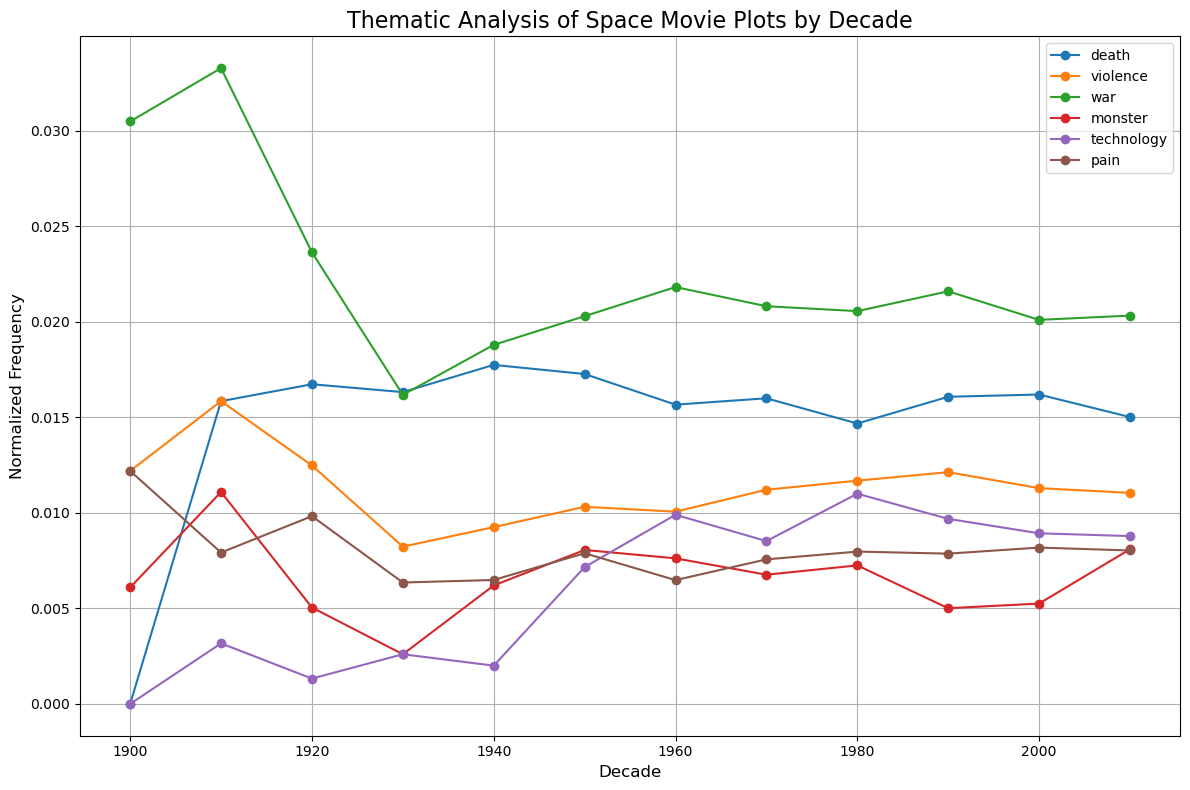

In [82]:
import matplotlib.pyplot as plt

# Visualiser les thèmes principaux
themes_to_plot = ["death", "violence", "war", "monster", "technology", "pain"]

plt.figure(figsize=(12, 8))
for theme in themes_to_plot:
    plt.plot(results_df.index, results_df[theme], marker='o', label=theme)

plt.title("Thematic Analysis of Space Movie Plots by Decade", fontsize=16)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
''' 
on sépare les données en 3 périodes distinctes 
'''